## K-Nearest Neighbor

The k-Nearest Neighbors ($\kappa$NN) classifier is probably the most simple classifier. Yet, it is a good baseline, since it is easy to understand, it can be analyzed in tems of Bayes-optimality and it performs also quite well. The $\kappa$NN classifier makes predictions based on the majority class among the nearest training examples. It is non-parametric and instance-based, meaning that it does not use a parametrized function class from which the classifier is determined by learning the parameters. Instead, it directly computes the prediction from the training data.

### Inference 
Given a (training) dataset $\mathcal{D}=\{(\vvec{x}_1,y_1),\ldots, (\vvec{x}_n,y_n)\}$ and a distance metric $dist(\vvec{x}_i,\vvec{x}_j)\in\mathbb{R}_+$ returning the nonnegative distance between two vectors $\vvec{x}_i,\vvec{x}_j\in\mathbb{R}^d$. We define the function $\kappa NN(\vvec{x})=\{i_1,\ldots, i_k\}$ returning the indices of the $\kappa$ closest neighbors of $\vvec{x}$ in $\mathcal{D}$. That is, we have
$$dist(x,x_{i_j})\leq dist(x,x_i) \text{ for all } 1\leq i\leq n.$$
```{prf:definition} kNN classifier
The kNN classifier returns the class probabilities estimated from the $\kappa$ neighbors: 
\begin{align*}
f_{knn}(\vvec{x})_l = \frac{1}{\kappa} \lvert\{i\in \kappa NN(x)\mid y_i=l\}\rvert    
\end{align*}
As a result, the class predictions are made by a majority vote of the nearest neighbors:
\begin{align*}
\hat{y}_{\kappa nn}(\vvec{x}) &= \argmax_l f_{\kappa nn}(\vvec{x})_l\\
&= \argmax_l \lvert\{i\in \kappa NN(x)\mid y_i=l\}\rvert 
\end{align*}
```
As a distance function we can use basically anything. Standard norm-induced distances are possible for continuous features
$$dist(\vvec{x}_i,\vvec{x}_j)=\lVert \vvec{x}_i - \vvec{x}_j\rVert,$$
but we can also integrate distance functions for discrete features, such as the Hamming distance (assuming we have $d$ categorical features)
$$dist(\vvec{x}_i,\vvec{x}_j) = \lvert \{{\vvec{x}_i}_k\neq {\vvec{x}_j}_m\mid 1\leq k,m\leq d\}\rvert$$

However, combining the distance functions over various kinds of features can be tricky and vastly influence the performance, as some distances may be weighted disproportionally to others.
#### Implementation Practice 
Computing a prediction of the $\kappa$NN classifier requires in principle the computation of distances to all datapoints, hence a computation time in $\mathcal{O}(n)$. This is quite costly for one prediction. We can imagine that in particular for bigger training datasets, this is far too expensive. However, there are some common strategies that are frequently applied in machine learning when we need to access local neighborhoods in an efficient manner. Two popular approaches to do so are kd-trees and locality-sensitive hashing.     

A k-dimensional tree (kd-tree) partitions the feature space recursively, allowing for faster nearest-neighbor queries in low-dimensional spaces ($d<20$). The search complexity is approximately $\mathcal{O}(\log ⁡n)$ in the average case.    

Locality-Sensitive Hashing (LSH) maps similar points to the same hash buckets. The proximity between points is reflected by their physical storage places. To find the nearest neighbors of a data point, we compute the hash key of this data point and access neighbors by looking into the hash buckets close to the hash bucket of the data point.

### Choosing $\kappa$
The $\kappa$NN classifier has one hyperparameter: the number of neighbors $\kappa$. If $\kappa$ is very small, then the classifier tends to overfit and is sensitive to noise or outliers in the data. If $\kappa$ is too large, then the $\kappa$NN classifier tends to underfit.   

The plot below shows the decision boundary of the $\kappa$NN classifier for three values of $k$ on the two moons synthetic dataset. The points reflect the training data set. For $\kappa=1$ we observe that the decision boundary is very fractured. We can imagine that a this decision boundary is very dependent on the data and hence the $\kappa$NN classifier with $\kappa=1$ has a high variance. The second value $\kappa=10$ is suitable to reflect the decision boundary of the two moons. It generalizes, since we observe that some of the red training data points in the area of the blue class do not influence the decision boundary. For $\kappa=50$ the model underfits. The shape of the two moons is not reflected by the decision boundary and the $\kappa$NN classifier resembles a linear classifier.  

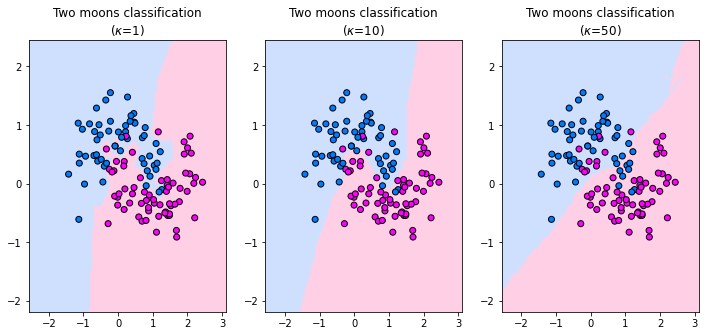

In [56]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons


X,y = make_moons(noise=0.3, random_state=0, n_samples=200)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

_, axs = plt.subplots(ncols=3, figsize=(12, 5))
cm = ListedColormap(["#a0c3ff", "#ffa1cf"])
cm_points = ListedColormap(["#007bff", "magenta"])
for ax, k in zip(axs, (1,10,50)):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        knn,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
        alpha=0.5,
        ax=ax,
        cmap=cm,
    )
    scatter = disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k",cmap = cm_points)
    _ = disp.ax_.set_title(
        f"Two moons classification\n($\kappa$={k})"
    )

plt.show()


In practice, we can determine $\kappa$ by cross-validation or by means of the validation set.
```{note}
For binary classification, it is important to employ an odd number of $ \kappa $ nearest neighbors to prevent a voting tie between the two classes. 
```

### Bayes consistency
Although the $\kappa$NN classifier is very simple, it is theoretically sound in the sense that we can show that it converges to the Bayes-optimal classifier in theory.
```{prf:theorem}
The kNN classifier converges to the Bayes classifier for $n\rightarrow \infty$ when choosing $\kappa$ such that 
* $\kappa\rightarrow \infty$ and 
* $\frac{\kappa}{n}\rightarrow 0$.
```
A classifier that converges to the Bayes classifier if the size of the dataset grows infinitely is called **Bayes consistent**. A popular choice of $\kappa$ in practice is $\kappa=\sqrt{n}$. Hence, for this choice of $\kappa$, the $\kappa$NN classifier is also Bayes consistent.
